In [1]:
!pip install -Uqq tornado

In [2]:
!pip install -Uqq fastbook

In [3]:
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *
from fastai.vision.widgets import *
import matplotlib.pyplot as plt

In [5]:
data_path = Path('/content/gdrive/MyDrive/BMEN 415/Image_Data')

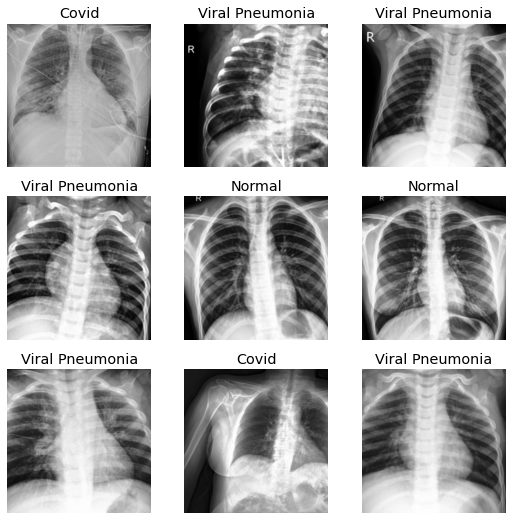

In [6]:
train_xray = DataBlock(blocks=(ImageBlock, CategoryBlock),item_tfms=Resize(256),splitter=GrandparentSplitter(train_name='Train',valid_name='Test'), get_items=get_image_files, get_y=parent_label)
dl = train_xray.dataloaders(data_path)
dl.train.show_batch()

In [7]:
learn = cnn_learner(dl, resnet18, metrics=accuracy)

In [8]:
learn.fine_tune(22) #Optimum number of epochs was decided as 22 since after 22 epochs the valid loss started increasing and accuracy decreasing

epoch,train_loss,valid_loss,accuracy,time
0,2.200881,1.781733,0.348485,00:22


epoch,train_loss,valid_loss,accuracy,time
0,0.839122,2.090648,0.393939,00:20
1,0.712996,1.838874,0.484848,00:20
2,0.574504,1.462062,0.560606,00:20
3,0.490040,1.161575,0.681818,00:21
4,0.413701,0.979169,0.727273,00:20
5,0.351419,0.901436,0.727273,00:19
6,0.297094,0.778726,0.742424,00:20
7,0.258967,0.661990,0.757576,00:20
8,0.225621,0.560316,0.833333,00:21
9,0.203638,0.537898,0.863636,00:20


In [9]:
learn.predict(data_path/'Test'/'Covid'/'094.png')

('Covid', TensorBase(0), TensorBase([1.0000e+00, 5.4607e-07, 7.2136e-08]))

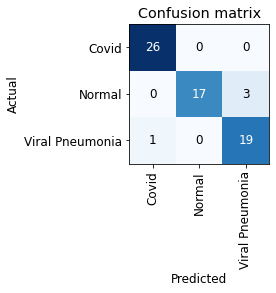

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()